Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


 Load and Prepare Data

In [3]:

data = pd.read_csv('/content/House Price India.csv')

print(data.head())


           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

Feature Selection

In [4]:

features = ['number of bedrooms', 'number of bathrooms', 'living area']
target = 'Price'

X = data[features]
y = data[target]


Train-Test Split

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Build and Train the Linear Regression Model

In [6]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Make Predictions and Evaluate the Model

In [7]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse:2f}")
print(f"R-squared: {r2:2f}")

Mean Squared Error: 66518099832.773705
R-squared: 0.550541


Visualize Predictions

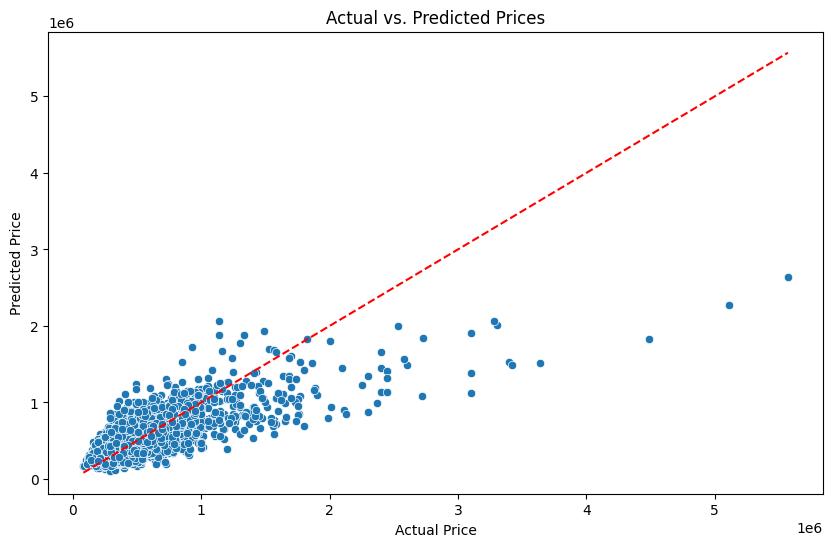

In [8]:

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


Inspect Coefficients

In [9]:
# Print model coefficients
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")


Model Coefficients:
Intercept: 66754.33039151528
number of bedrooms: -53701.939476302665
number of bathrooms: 5675.433890448042
living area: 305.7371847385202


In [10]:
new_house=[[4,2,2800]]

pred_price=model.predict(new_house)
print(f"Predicted price is: {pred_price[0]}")

Predicted price is: 719361.5575350573


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
